In [1]:
# импорт библиотек для разведочного анализа
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# загрузка просмотр датасетов
# X_bp - бальзатопластик
# X_nup - нашивка углепластика
X_bp = pd.read_excel('../data/X_bp.xlsx', index_col=0)
X_nup = pd.read_excel('../data/X_nup.xlsx', index_col=0)

In [3]:
X_bp

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            1.857143       2030.000000   
1                            1.857143       2030.000000   
2                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  
0                       3000.000000               220.000000  
1                       3000.000000               220.000000  
2                       3000.000000               220.000000  
3                       3000.000000               220.000000  
4                       3000.000000               220.000000  
...                             ...                      ...  
1018                    2387.292495               125.007669  
1019                    2360.392784               117.730099  
1020                    2662.906040               236.606764  
1021                    2071.715856               197.126067  
1022                    2856.328932               194.754342  

[1023 rows x 10 columns]

In [4]:
X_bp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(10)
memory usage: 87.9 KB


In [5]:
X_nup

Угол нашивки, град  Шаг нашивки  Плотность нашивки
0                      0     4.000000          57.000000
1                      0     4.000000          60.000000
2                      0     4.000000          70.000000
3                      0     5.000000          47.000000
4                      0     5.000000          57.000000
...                  ...          ...                ...
1035                  90     8.088111          47.759177
1036                  90     7.619138          66.931932
1037                  90     9.800926          72.858286
1038                  90    10.079859          65.519479
1039                  90     9.021043          66.920143

[1040 rows x 3 columns]

In [6]:
X_nup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040 entries, 0 to 1039
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Угол нашивки, град  1040 non-null   int64  
 1   Шаг нашивки         1040 non-null   float64
 2   Плотность нашивки   1040 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 32.5 KB


In [7]:
# значений null ни у одной фичи нет, но также нет и иных сведений для объединения датафреймов, кроме индекса строки ->
# объединение по индексу с отбрасыванием несовпадающих строк (inner join)
df = X_bp.join(X_nup, how='inner')
df.sample(n=10, random_state=42).T

525          357          444  \
Соотношение матрица-наполнитель          3.790051     2.661267     3.174404   
Плотность, кг/м3                      1962.764956  1948.878616  1980.823788   
модуль упругости, ГПа                  673.263749   719.246538   459.047070   
Количество отвердителя, м.%             73.780951    97.874782    81.162535   
Содержание эпоксидных групп,%_2         18.800746    21.376260    21.787358   
Температура вспышки, С_2               351.088180   273.888846   322.371649   
Поверхностная плотность, г/м2          412.504400   976.777577   233.898871   
Модуль упругости при растяжении, ГПа    77.180805    77.171209    73.789821   
Прочность при растяжении, МПа         2572.155786  2414.507362  2219.142605   
Потребление смолы, г/м2                271.263323   162.998234   200.414215   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              5.333214     7.358027     3.717884   
Плотность нашивки                       44.180650    49.360765    48.955385   

                                              31           618          587  \
Соотношение матрица-наполнитель          1.771436     3.276517     3.521605   
Плотность, кг/м3                      1872.491560  1911.245306  1993.219156   
модуль упругости, ГПа                  801.033883   213.466388   445.475813   
Количество отвердителя, м.%             79.794548    78.847811   129.442140   
Содержание эпоксидных групп,%_2         22.296304    21.778934    20.726427   
Температура вспышки, С_2               340.736898   226.990371   301.971866   
Поверхностная плотность, г/м2          864.929184   113.590494   399.815520   
Модуль упругости при растяжении, ГПа    70.947592    72.695218    68.708028   
Прочность при растяжении, МПа         2796.785402  2734.030447  2379.634946   
Потребление смолы, г/м2                123.356264   223.770443   209.654610   
Угол нашивки, град                      90.000000    90.000000    90.000000   
Шаг нашивки                              7.000000     8.776210     9.752380   
Плотность нашивки                       70.000000    58.450719    59.888382   

                                              447          734          76   \
Соотношение матрица-наполнитель          3.501415     2.546782     1.940021   
Плотность, кг/м3                      2037.052469  1854.074417  1969.623612   
модуль упругости, ГПа                  746.020626   869.296654  1251.789906   
Количество отвердителя, м.%            109.701267   141.464466    92.419328   
Содержание эпоксидных групп,%_2         22.881159    19.370649    22.244669   
Температура вспышки, С_2               261.351487   316.051131   291.935734   
Поверхностная плотность, г/м2          828.061175   564.800906   565.339508   
Модуль упругости при растяжении, ГПа    73.528438    73.772607    69.181599   
Прочность при растяжении, МПа         2475.114083  1264.310682  2757.130303   
Потребление смолы, г/м2                205.540520   257.467826   211.912630   
Угол нашивки, град                       0.000000    90.000000     0.000000   
Шаг нашивки                              7.539173     8.682344     9.245585   
Плотность нашивки                       52.246884    56.791692    40.608103   

                                              715  
Соотношение матрица-наполнитель          2.009728  
Плотность, кг/м3                      1856.029075  
модуль упругости, ГПа                  711.461689  
Количество отвердителя, м.%            120.828679  
Содержание эпоксидных групп,%_2         25.586728  
Температура вспышки, С_2               295.217201  
Поверхностная плотность, г/м2           93.444371  
Модуль упругости при растяжении, ГПа    75.692768  
Прочность при растяжении, МПа         3052.726920  
Потребление смолы, г/м2                309.803579  
Угол нашивки, град                      90.000000  
Шаг нашивки                             10.198703  
Плотность нашивки                       63.742401

# РАЗВЕДОЧНЫЙ АНАЛИЗ ДАННЫХ

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [9]:
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [10]:
df.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

In [11]:
#проверка пропусков
df.isna().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [12]:
#проверка дубликатов
df.duplicated().sum()

0

In [26]:
len(df[df['Угол нашивки, град'] == 0])

520

In [28]:
len(df[df['Угол нашивки, град'] == 90])

503

array([[<AxesSubplot:title={'center':'Соотношение матрица-наполнитель'}>,
        <AxesSubplot:title={'center':'Плотность, кг/м3'}>,
        <AxesSubplot:title={'center':'модуль упругости, ГПа'}>,
        <AxesSubplot:title={'center':'Количество отвердителя, м.%'}>],
       [<AxesSubplot:title={'center':'Содержание эпоксидных групп,%_2'}>,
        <AxesSubplot:title={'center':'Температура вспышки, С_2'}>,
        <AxesSubplot:title={'center':'Поверхностная плотность, г/м2'}>,
        <AxesSubplot:title={'center':'Модуль упругости при растяжении, ГПа'}>],
       [<AxesSubplot:title={'center':'Прочность при растяжении, МПа'}>,
        <AxesSubplot:title={'center':'Потребление смолы, г/м2'}>,
        <AxesSubplot:title={'center':'Угол нашивки, град'}>,
        <AxesSubplot:title={'center':'Шаг нашивки'}>],
       [<AxesSubplot:title={'center':'Плотность нашивки'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

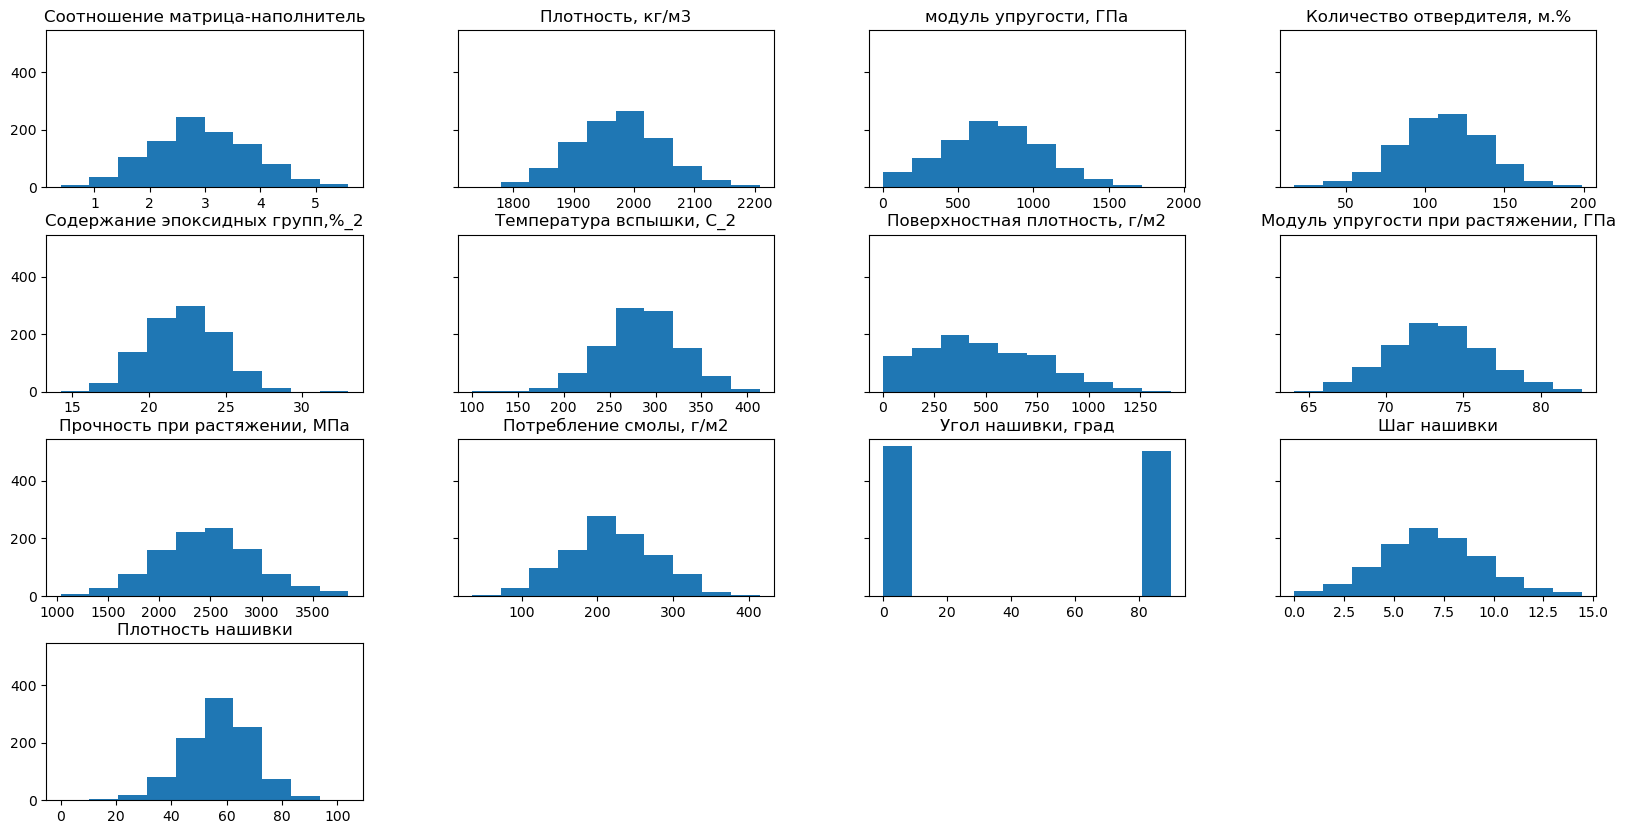

In [13]:
df.hist(figsize = (20, 10), grid = False, sharey = True)

In [ ]:
# визуально распределение каждого показателя близко к нормальному (поверхностная плотность чуть более смещена), 
# разумеется, кроме угла нашивки, где всего 2 значения

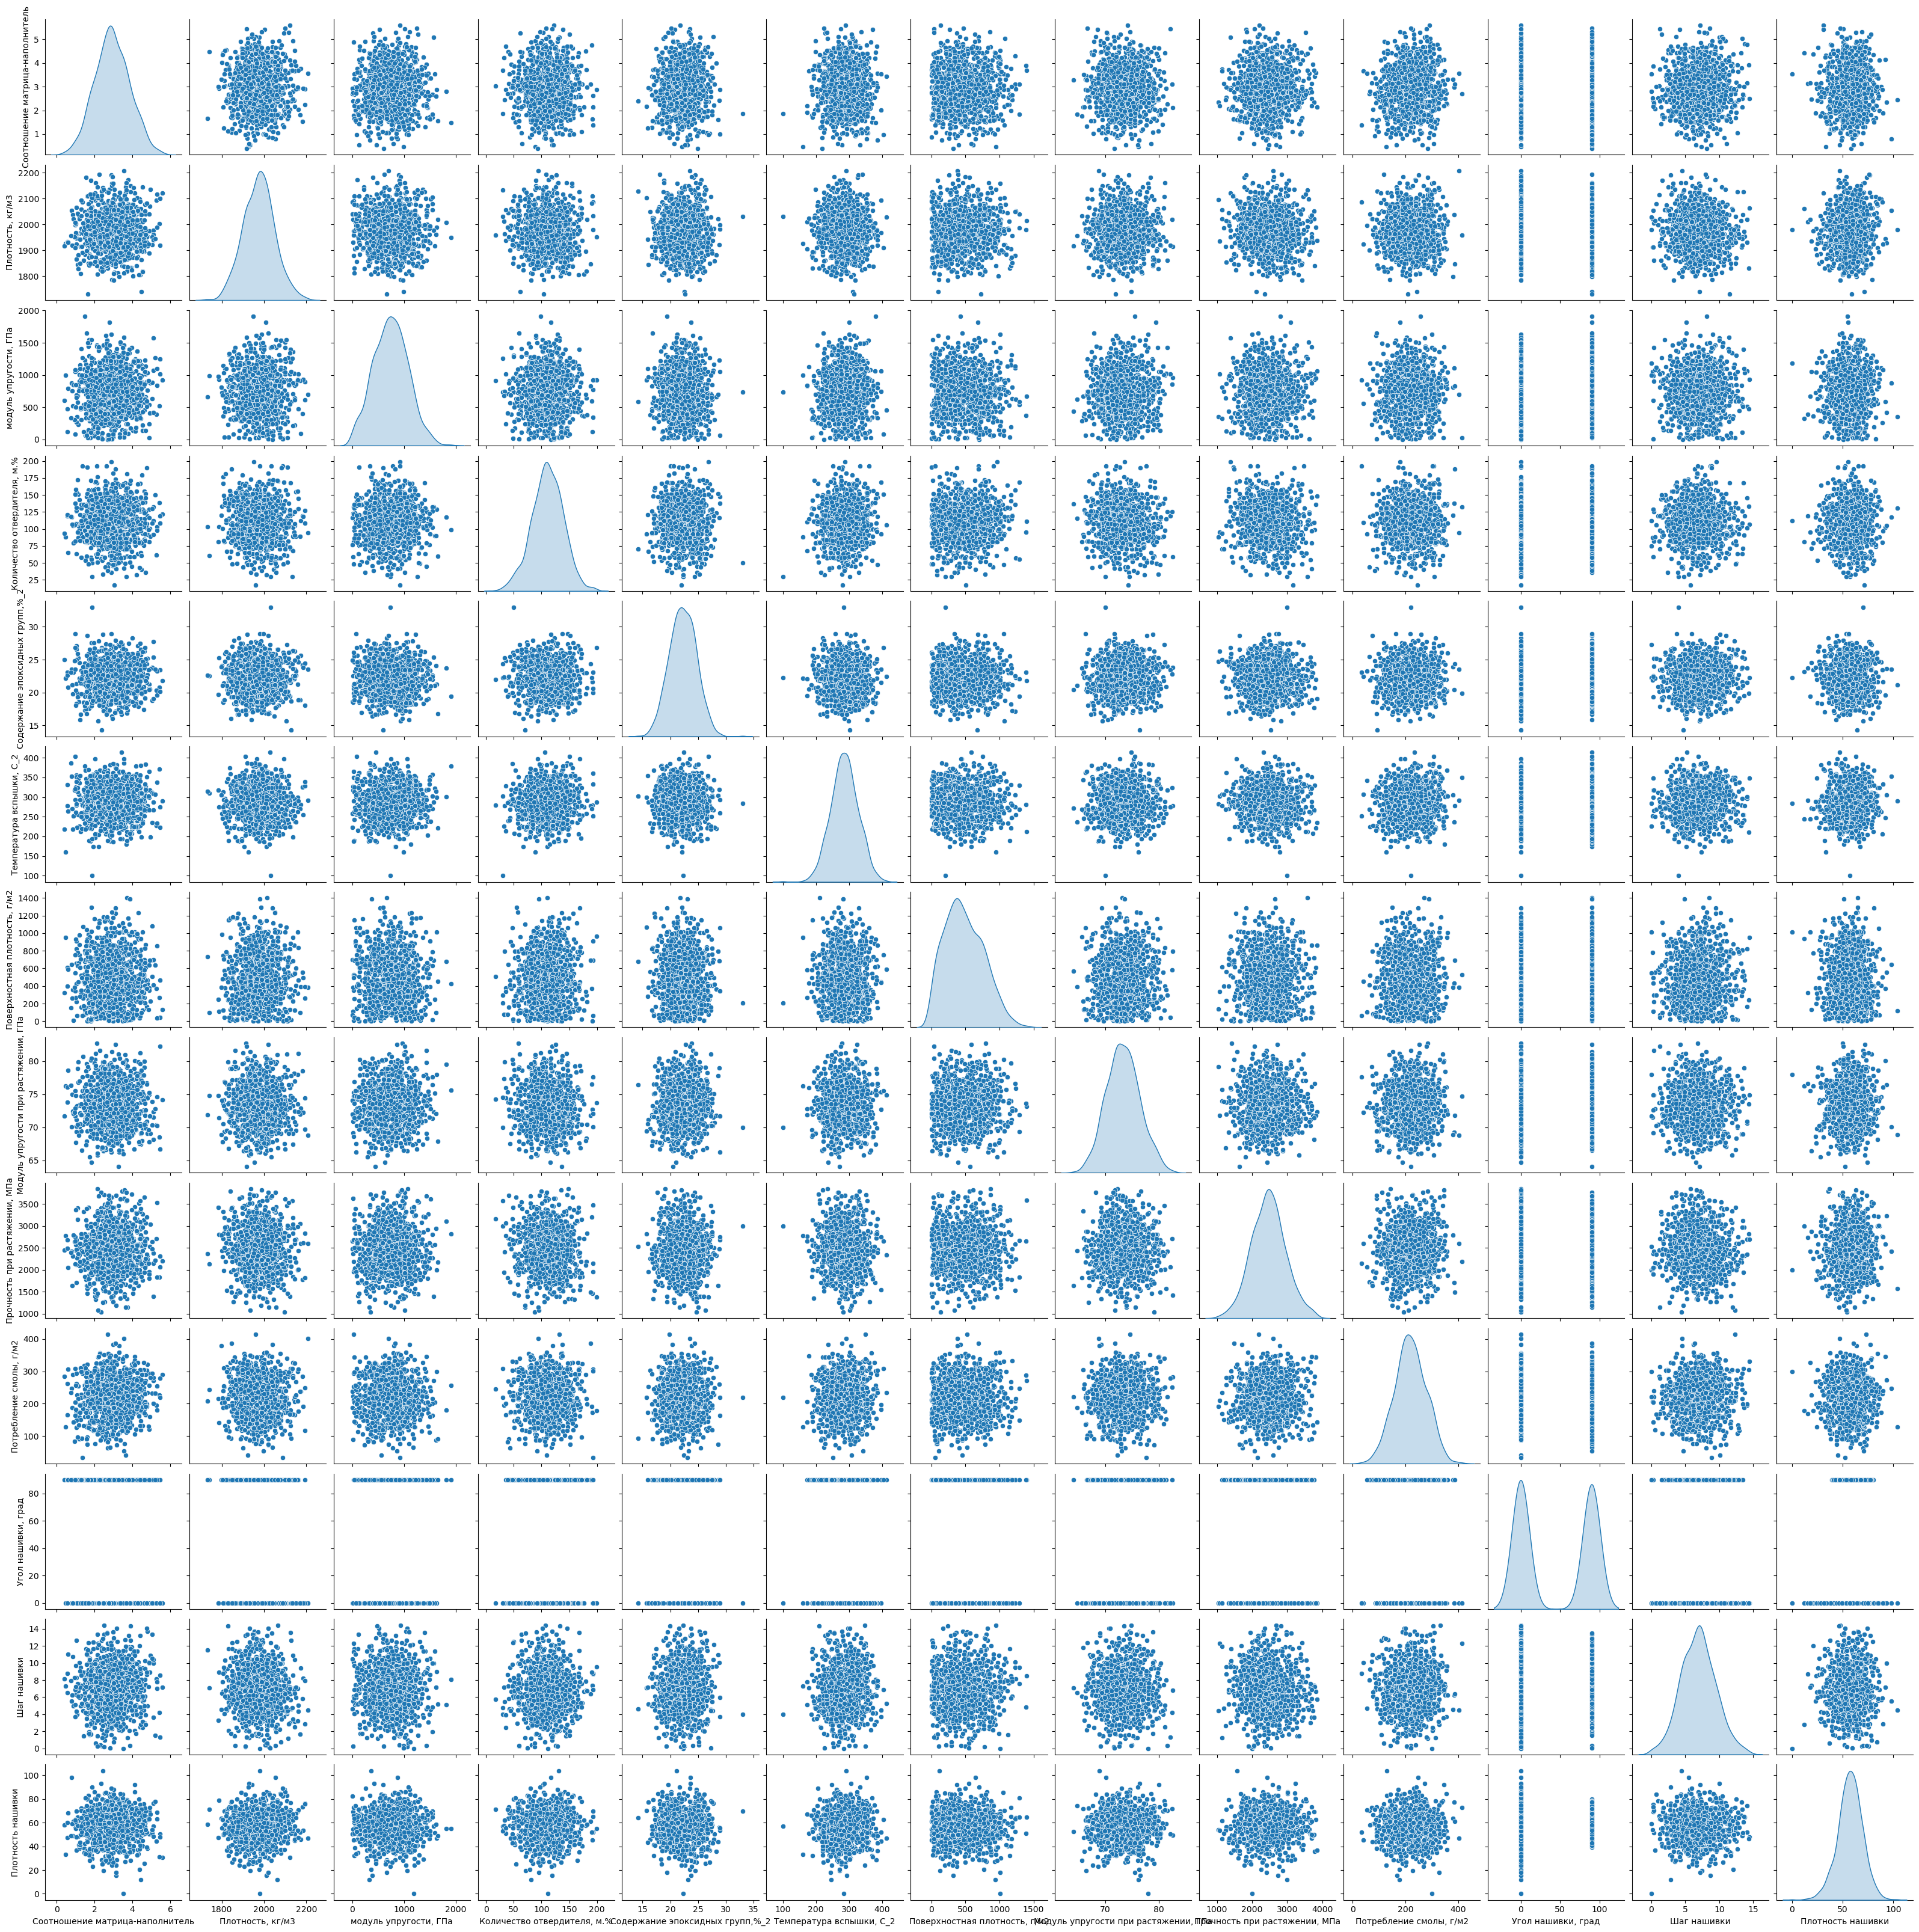

In [15]:
sns.pairplot(df, diag_kind='kde')

In [ ]:
# корреляции между признаками визуально не наблюдается

# ПРЕДОБРАБОТКА ДАННЫХ

In [ ]:
import tensorflow as tf


In [ ]:
#1.	Аналитическая часть
#1.1.	Постановка задачи.
#В данном разделе приводится в текстовом виде смысловое описание решаемой задачи анализа данных. 
#Также дается характеристика датасета – число входных и выходных переменных (факторов), объем выборки, 
#характеристика выборки с точки зрения ее особенностей (выбросы, пропуски и т.д.).


In [ ]:
# pipeline
# Формулирование проблемы (определение цели, оценка текущей ситуации, подготовка плана)
# Сбор данных (сбор, описание, изучение, проверка качества данных)
# Предобработка данных (выборка, очистка, генерация, интеграция, форматирование)
# Проектирование (выбор алгоритмов), разработка, обучение, тестирование (оценка качества модели) - циклично
# Постобработка результатов (оценка результатов, процесса, определение следующих шагов)
# Введение в эксплуатацию (внедрение, планирование мониторинга и поддержки, подготовка отчета, ревью проекта)
# Решение проблемы

In [ ]:
#Структура базового проекта

#README.md файл с инструкцией для запуска и любой важной информацией
#requirements.txt файл, в котором перечислены все необходимые зависимости
#файлы *. py модули программы

#data папка с наборами данных, включающая в себя папки (можно разбить эти папки на train и test):
    # raw сырые данные, то есть данные в том виде, в котором были получены
    # processed данные после различных преобразований (удаление выбросов, заполнение пропусков и т.д.)
    
#models папка с моделями и их параметрами Внутри может быть создана папка logs с логами обучения

#notebooks папка с «тетрадками»:
    #eda [Exploratory Data Analysis (Data Exploration )]исследование данных.
    #poc [Proof of Concept] проверка концепции. Разработка некоторого прототипа или его частей, которые отражают
                            #основную идею. Проверка осуществимости и применимости различных методов
                            #modeling построение модели и ее обучение
    #evaluation оценка качества модели

#src (source code) папка с исходным кодом программы, которая может делиться на следующие подпапки:
    #preparation подготовка данных (выгрузка из базы данных, чтение из файла...). Все, что нужно сделать перед обработкой
    #processing обработка данных: чистка, трансформации, преобразования
    #modeling построение модели
            #В данной структуре удобно создавать файлы utils py (для всяких вспомогательных функций), 
                                                    #  train py (для обучения модели),
                                                    #  predict py (для получения предсказаний)

#test папка с тестами (для кода программы, а не модели!)

In [ ]:
#1.2.	Описание используемых методов
#В данном разделе приводится краткое описание методов (не более 1 страницы на каждый), 
#которые предполагается использовать для решения поставленной задачи. 
#Необходимо обратить особое внимание на достоинства, недостатки и области применения каждого из методов. 
#Кроме того, желательно составление итоговой сравнительной таблицы с указанием среди прочего 
#априорных предпосылок к работоспособности каждого метода.
#Линейная регрессия
#Логистическая регрессия
#SVM (метод опорных векторов)
#KNN (метод k-ближайших соседей)
#Метод k-средних
#Дерево решений
#Random Forest
#Наивный байесовский классификатор
#AdaBoost, или адаптивный бустинг
#Gradient Boost и XGBoost
#LightGBM
#Алгоритмы сокращения размеров
#Алгоритмы усиления градиента
#Нейросетевая регрессия
#Регрессия LASSO
#Гребневая регрессия (ридж-регрессия)
#Регрессия ElasticNet



In [ ]:
#1.3.	Разведочный анализ данных
#В данном разделе приводится краткое описание методов разведочного анализа данных, 
#которые используются для первоначального анализа. 


In [ ]:
#предобработка данных

In [ ]:
#2.	Практическая часть
#2.1.	Предобработка данных
#В данном разделе приводится графики распределения для каждого признака до и после нормализации, 
#указать максимальные и минимальные значения. 


In [ ]:
#модели и нейросеть

In [ ]:
#2.2.	Разработка и обучение модели
#В данной части приводится список моделей, которые будут использоваться для прогноза 
#модуля упругости при растяжении и прочности при растяжении. 


In [ ]:
#2.	Обучить алгоритм машинного обучения, который будет определять значения:
#-	Модуль упругости при растяжении, ГПа
#-	Прочность при растяжении, МПа


In [ ]:
#2.3.	Тестирование модели
#В данном разделе показывается ошибка каждой модели на тренировочной и тестирующей части выборки. 
#Обосновывается выбор модели.


In [ ]:
#3.	Написать нейронную сеть, которая будет рекомендовать:
#-	Соотношение матрица-наполнитель


In [ ]:
#2.4.	Написать нейронную сеть, которая будет рекомендовать соотношение матрица. 
#Описывается выбранная архитектура нейронной сети и ее результаты.


In [ ]:
#приложение

In [ ]:
pip freeze > requirements.txt


In [ ]:
#2.5.	Разработка приложения
#Описать функционал приложения и краткую инструкцию использования.


In [ ]:
#4.	Написать приложение, которое будет выдавать прогноз полученный в задании 2 или 3 
#(один или два прогноза, на выбор учащегося)

In [ ]:
#2.6.	Создание удаленного репозитория и загрузка результатов работы на него.
#Указывается страница слушателя, созданный репозиторий, коммиты в репозитории.
#1.	Создать профиль на github.com 
#2.	Сделать commit приложения на github.com
#3.	Сделать commit на веб-хостинг (По желанию учащегося)
#4.	Написать пояснительную записку к проекту, которая включает блок-схему и описание  процесса подготовки, 
#обучения моделей и инструкцию по установке и запуску приложения. 

